In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"D:\python practice\Amazon.csv")
df.head()


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,31-01-2023,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,30-12-2023,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,10-05-2022,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,18-07-2023,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,04-02-2023,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

OrderID          0
OrderDate        0
CustomerID       0
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64

In [3]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True)
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month


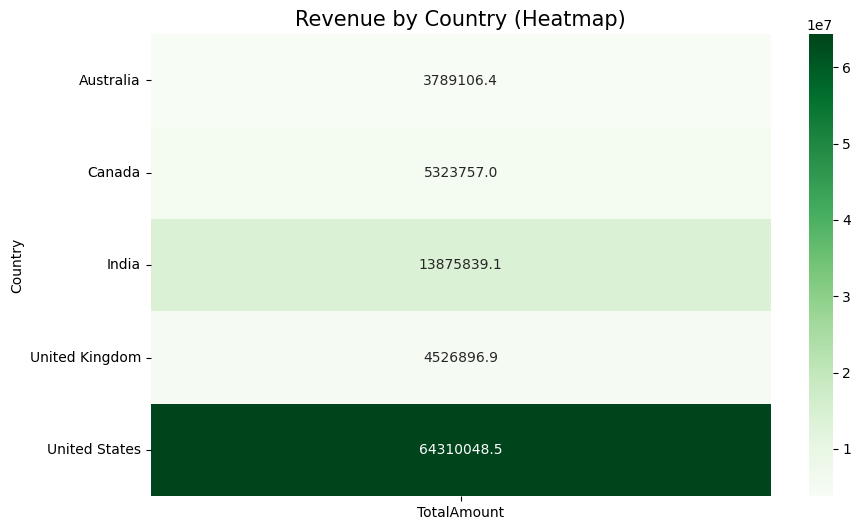

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

country_sales = df.groupby("Country")["TotalAmount"].sum().reset_index()
country_sales = country_sales.pivot_table(values="TotalAmount", index="Country")

plt.figure(figsize=(10,6))
sns.heatmap(country_sales, cmap="Greens", annot=True, fmt=".1f")
plt.title("Revenue by Country (Heatmap)", fontsize=15)
plt.show()


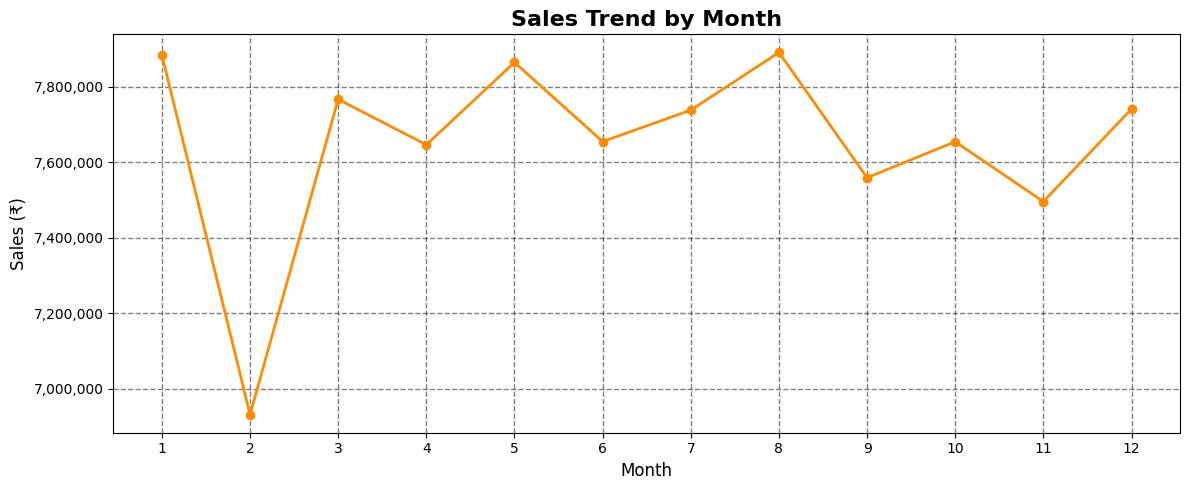

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sales_month = df.groupby('Month')['TotalAmount'].sum().sort_index()

plt.figure(figsize=(12,5))

plt.plot(sales_month.index, sales_month.values, 
         marker='o', color='darkorange', linewidth=2)

plt.title("Sales Trend by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales (₹)", fontsize=12)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(ticks=range(1,13), labels=range(1,13))

plt.grid(True, linestyle='--', alpha=0.5,color='black',linewidth=1)

plt.tight_layout()
plt.show()


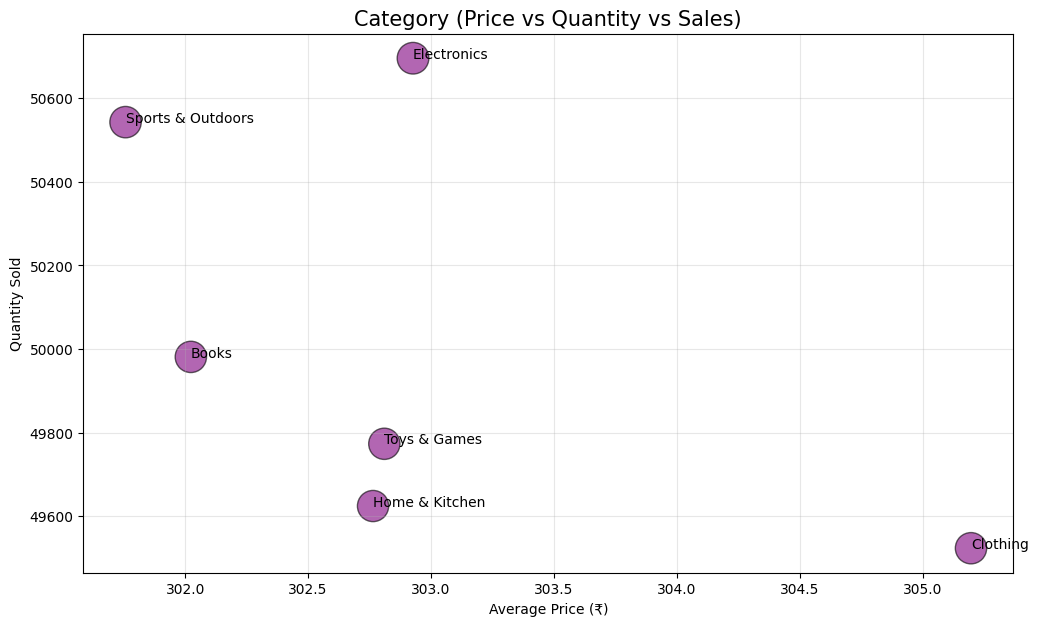

In [6]:
import matplotlib.pyplot as plt

cat_df = df.groupby("Category").agg(
    avg_price=("UnitPrice","mean"),
    total_sales=("TotalAmount","sum"),
    qty=("Quantity","sum")
).reset_index()

plt.figure(figsize=(12,7))
plt.scatter(cat_df["avg_price"], cat_df["qty"],
            s=cat_df["total_sales"]/30000,
            alpha=0.6, color="purple", edgecolor="black")

for i in range(len(cat_df)):
    plt.text(cat_df["avg_price"][i],
             cat_df["qty"][i],
             cat_df["Category"][i],
             fontsize=10)

plt.title("Category (Price vs Quantity vs Sales)", fontsize=15)
plt.xlabel("Average Price (₹)")
plt.ylabel("Quantity Sold")
plt.grid(alpha=0.3)
plt.show()


In [7]:
pivot = df.groupby(["Category", "Brand"])["TotalAmount"].sum().unstack().fillna(0)


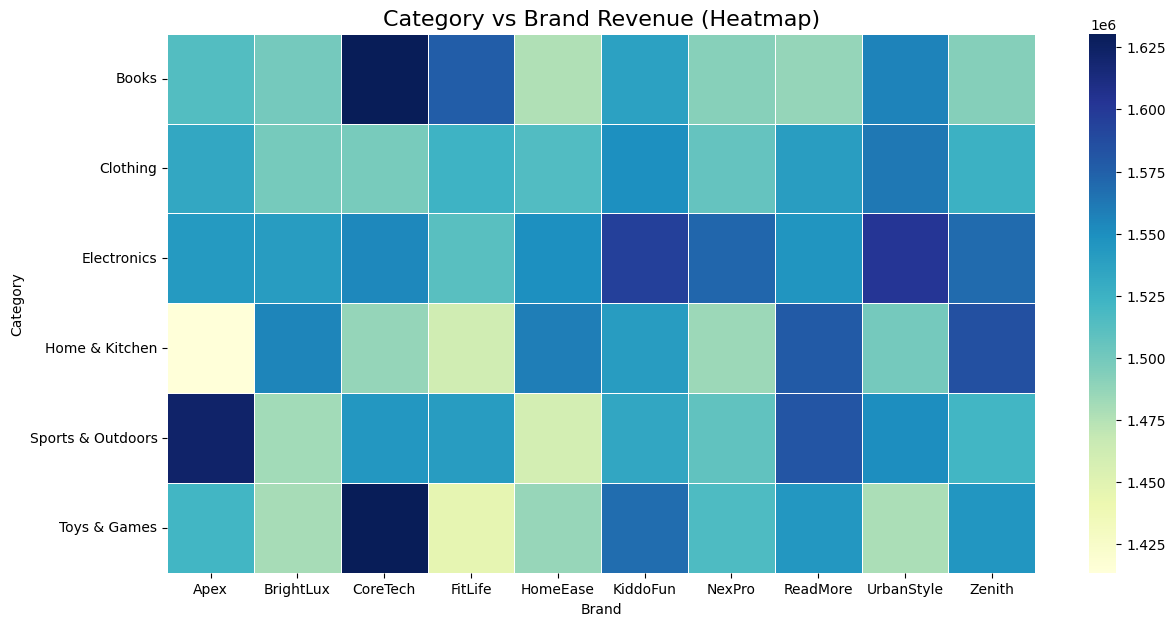

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = df.groupby(["Category","Brand"])["TotalAmount"].sum().unstack().fillna(0)

plt.figure(figsize=(14,7))
sns.heatmap(pivot_df, cmap="YlGnBu", linewidths=.5)

plt.title("Category vs Brand Revenue (Heatmap)", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Category")
plt.show()


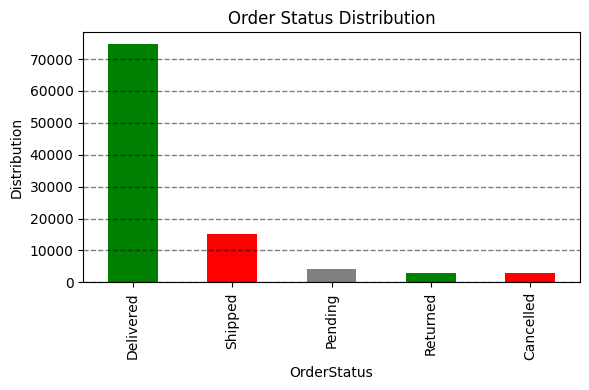

In [9]:
plt.figure(figsize=(6,4))
df['OrderStatus'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Order Status Distribution")
plt.ylabel("Distribution", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5,color='black',linewidth=1)
plt.tight_layout()
plt.show()


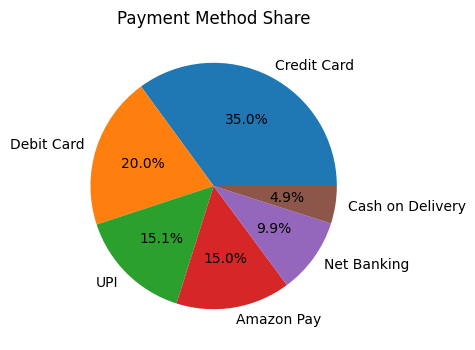

In [10]:
plt.figure(figsize=(8,4))
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Share")
plt.ylabel("")
plt.show()


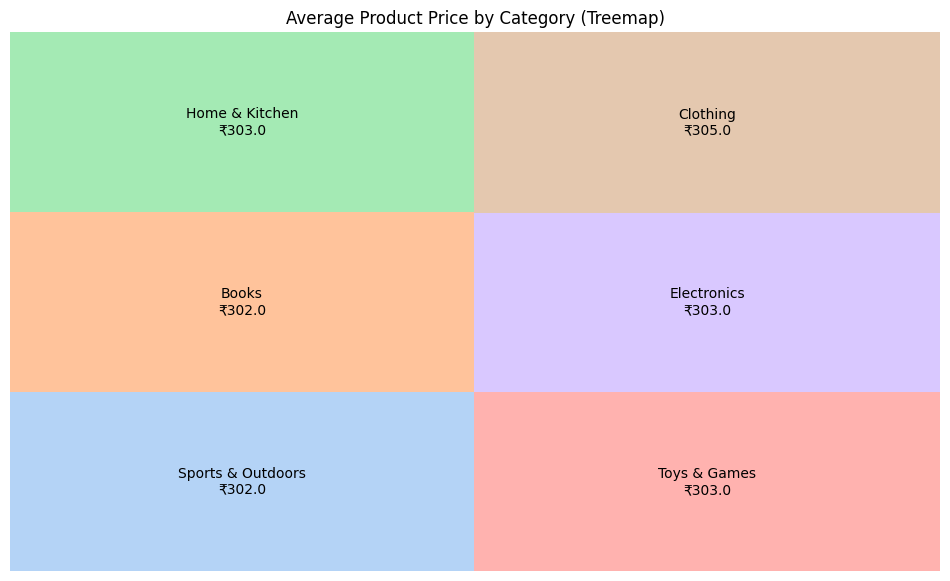

In [11]:
import squarify
import matplotlib.pyplot as plt

avg_price = df.groupby('Category')['UnitPrice'].mean().sort_values()

plt.figure(figsize=(12,7))
squarify.plot(
    sizes=avg_price.values,
    label=avg_price.index + "\n₹" + avg_price.round().astype(str),
    alpha=0.8,
    color=sns.color_palette('pastel')
)
plt.title("Average Product Price by Category (Treemap)")
plt.axis('off')
plt.show()


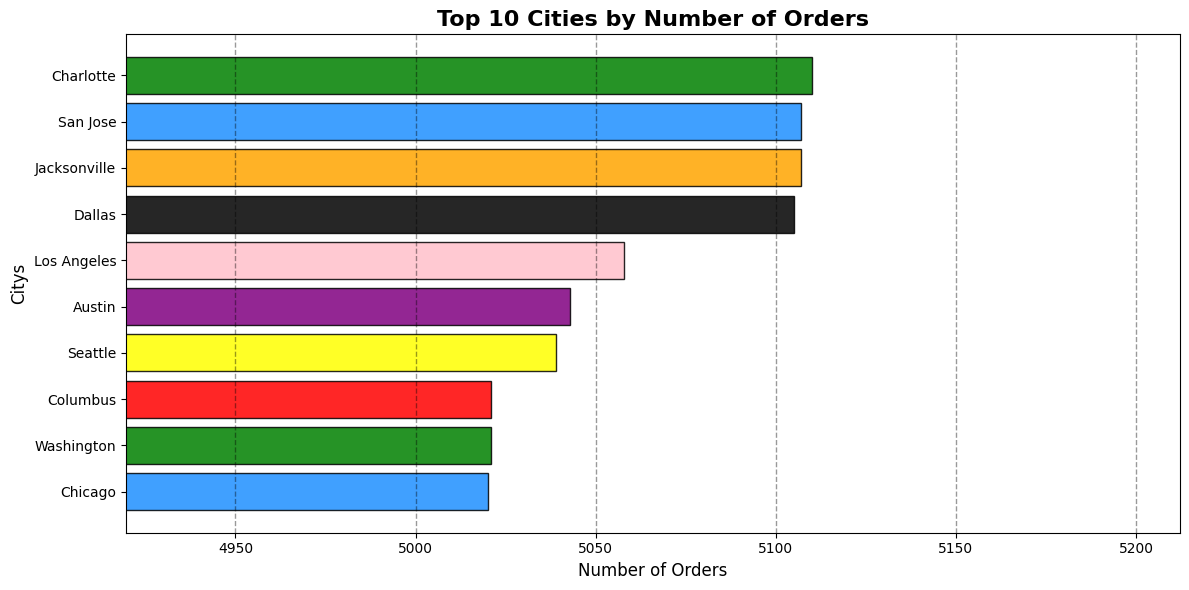

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

top_cities = df['City'].value_counts().head(10).sort_values()

plt.figure(figsize=(12,6))

bars = plt.barh(top_cities.index, top_cities.values, 
                color=['dodgerblue','green','red','yellow','purple','pink','black','orange'], edgecolor='black', alpha=0.85)

plt.title("Top 10 Cities by Number of Orders", fontsize=16, fontweight='bold')
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Citys", fontsize=12)

# 🔥 Y-axis zoom to show differences clearly
y_min = top_cities.min() * 0.98
y_max = top_cities.max() * 1.02
plt.xlim([y_min, y_max])

# Add clean grid
plt.grid(axis='x', linestyle='--', alpha=0.4,color='black',linewidth=1)

plt.tight_layout()
plt.show()


In [13]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])


In [14]:
df["Month"] = df["OrderDate"].dt.to_period("M").dt.to_timestamp()


In [15]:
monthly_sales = df.groupby("Month")["TotalAmount"].sum().reset_index()


In [16]:
monthly_sales.head()


,Month,TotalAmount
0,2020-01-01,1637069.40
1,2020-02-01,1339388.21
2,2020-03-01,1587125.66
3,2020-04-01,1588347.29
4,2020-05-01,1533834.17


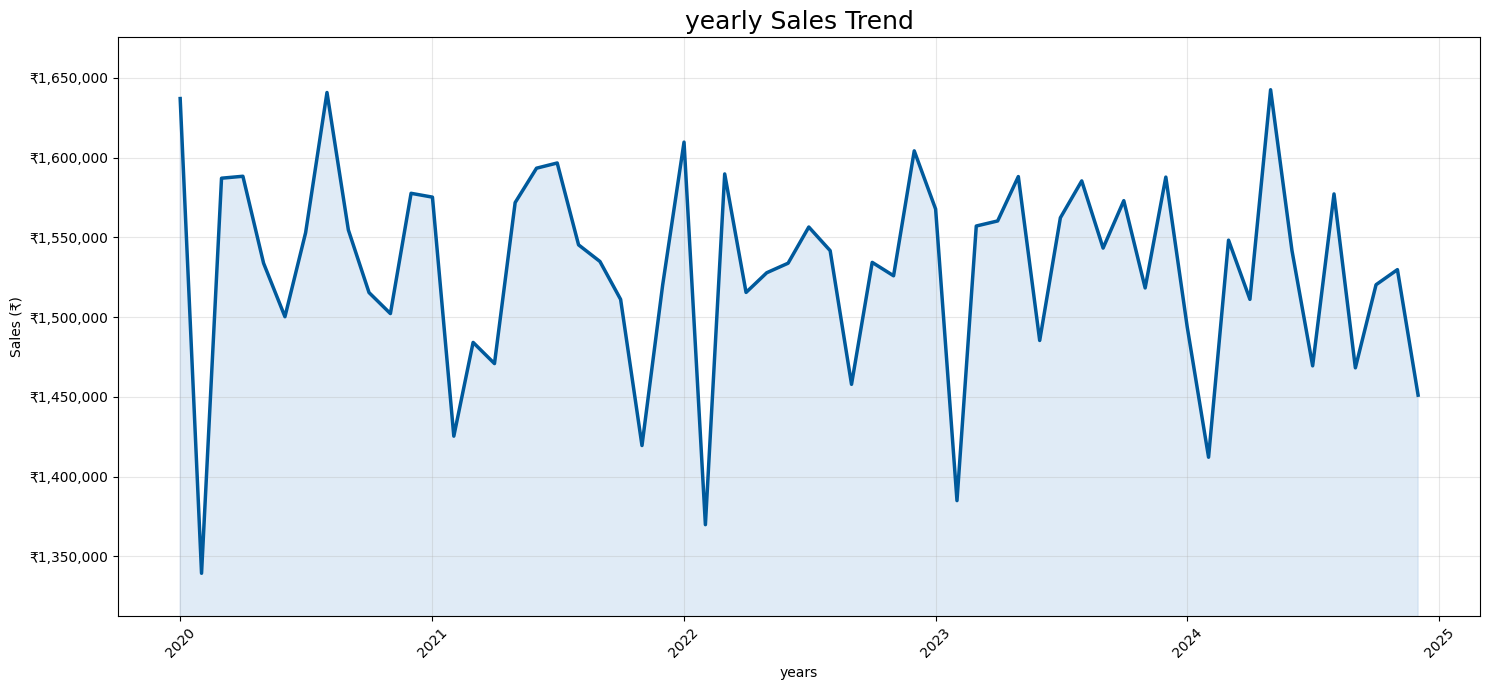

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Monthly Sales Trend Plot
plt.figure(figsize=(15,7))
plt.fill_between(monthly_sales["Month"], monthly_sales["TotalAmount"],
                 color="#A7C7E7", alpha=0.35)

plt.plot(monthly_sales["Month"], monthly_sales["TotalAmount"],
         color="#005A9C", linewidth=2.5)

plt.ylim(monthly_sales["TotalAmount"].min() * 0.98, 
         monthly_sales["TotalAmount"].max() * 1.02)

plt.title("yearly Sales Trend", fontsize=18)
plt.xlabel("years")
plt.ylabel("Sales (₹)")

# FORMAT ₹ NUMBERS
formatter = mtick.StrMethodFormatter("₹{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ ACTIONABLE INSIGHTS – Amazon Sales Analysis


🔹 1. Category Performance

Electronics and Home & Kitchen are the highest revenue-generating categories.

These categories should be prioritized for inventory expansion and promotions.

 Action:
Increase ad spend and stock availability for top-performing categories.

🔹 2. Brand Contribution

A small number of brands contribute a disproportionately large share of revenue.

Long-tail brands have lower sales but higher growth potential.

 Action:
Create brand partnership programs for top brands and targeted discounts for emerging brands.

🔹 3. Monthly Sales Trend

Sales show consistent performance with seasonal spikes.

Peak months indicate strong customer demand during festive or sale periods.

 Action:
Plan seasonal campaigns and flash sales during high-performing months.

🔹 4. Customer Purchase Behavior

Customers prefer repeat purchases in specific categories.

Discount-sensitive products show higher order volume.

 Action:
Introduce loyalty programs and personalized recommendations.

🔹 5. Country-wise Revenue

One or two countries dominate total revenue contribution.

Other regions are under-penetrated.

 Action:
Run region-specific marketing campaigns to expand market share.

🔹 6. Product Pricing Insights

Mid-priced products generate the highest total revenue, not the most expensive ones.

 Action:
Optimize pricing strategy focusing on value-for-money segments.

🔹 7. Operational Insights

Shipping and tax contribute significantly to total order cost.

 Action:
Optimize logistics and negotiate shipping costs to improve margins.

🔹 8. Overall Business Impact

Data-driven decisions can significantly improve sales, customer retention, and profitability.

 Action:
Use dashboards for real-time monitoring and forecasting.